In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from scipy.signal import savgol_filter

In [2]:
import scienceplots

In [146]:
plt.style.use(['science',"ieee"])  #In this command ieee has higher priority than science if available
plt.rcParams['legend.fontsize'] = 4
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['text.usetex'] = False


In [4]:
df_global = pd.read_csv("global loss.csv")
df_global.head()

,Step,fedk - global_loss,fedk - global_loss__MIN,fedk - global_loss__MAX
0,1,7.949340,7.949340,7.949340
1,3,7.450063,7.450063,7.450063
2,5,7.051899,7.051899,7.051899
3,7,6.625839,6.625839,6.625839
4,9,6.286581,6.286581,6.286581


In [5]:
global_loss = df_global['fedk - global_loss'].to_numpy()

In [11]:
df_local_losses = pd.read_csv("local losses.csv")
df_local_losses.head()
len(df_local_losses)

972

In [12]:
dfs = np.split(df_local_losses, 27)
splited_dfs = [dfs[i].groupby(['task']).mean().reset_index() for i in range(27)]

/home/ahmed/miniconda3/envs/rl/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [13]:
all_tasks = pd.concat([df['task'] for df in splited_dfs]).unique()
result_df = pd.DataFrame({'task': all_tasks})
result_df

,task
0,Commonsense Classification
1,Mathematics
2,Misc.
3,Preposition Prediction
4,Program Execution
5,Question Answering
6,Question Generation
7,Question Understanding
8,Sentiment Analysis
9,Spelling Error Detection


In [14]:
for i, df in enumerate(splited_dfs):
    df = df.rename(columns={'train_loss': f'train_loss_{i+1}'})
    result_df = pd.merge(result_df, df, on='task', how='left')



In [15]:

# Fill missing values with 0
result_df2 = result_df.fillna(0)

# Forward fill missing values for each task across columns
for index, row in result_df2.iterrows():
    row[1:] = row[1:].replace(0, method='ffill')
    result_df2.iloc[index] = row

/tmp/ipykernel_147520/3122114938.py:6: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  row[1:] = row[1:].replace(0, method='ffill')
/tmp/ipykernel_147520/3122114938.py:6: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  row[1:] = row[1:].replace(0, method='ffill')
/tmp/ipykernel_147520/3122114938.py:6: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  row[1:] = row[1:].replace(0, method='ffill')
/tmp/ipykernel_147520/3122114938.py:6: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  row[1:] = row[1:].replace(0, method='ffill')
/tmp/ipykernel_147520/3122114938.py:6: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  row[1:] = row[1:].replace(0, method='ffill')
/tmp/ipykernel_147520/312

In [16]:
result_df2.to_csv("merged results 2.csv", index=False)

In [17]:
final_res = pd.read_csv("merged results 2.csv")
final_res.head()

,task,train_loss_1,train_loss_2,train_loss_3,train_loss_4,train_loss_5,train_loss_6,train_loss_7,train_loss_8,train_loss_9,...,train_loss_18,train_loss_19,train_loss_20,train_loss_21,train_loss_22,train_loss_23,train_loss_24,train_loss_25,train_loss_26,train_loss_27
0,Commonsense Classification,10.111733,9.415247,9.415247,9.415247,9.415247,6.662469,5.820769,5.538331,5.538331,...,1.925861,0.574001,0.574001,0.505574,0.418252,0.418252,0.418252,0.418252,0.454970,0.418950
1,Mathematics,12.299696,12.299696,12.299696,12.299696,12.299696,12.299696,12.299696,12.299696,12.299696,...,3.178407,3.178407,3.178407,3.178407,3.178407,3.178407,3.178407,3.178407,2.620128,2.620128
2,Misc.,9.264440,9.264440,3.931647,8.525578,8.625062,6.060192,7.681485,6.966568,6.966568,...,5.090390,1.492968,2.091321,1.253356,1.253356,2.997457,1.760030,0.669813,0.683848,2.397759
3,Preposition Prediction,15.276531,15.276531,15.276531,15.276531,15.276531,15.276531,15.276531,15.276531,15.276531,...,4.074138,4.074138,4.074138,3.625906,3.625906,3.625906,3.625906,3.625906,3.625906,3.625906
4,Program Execution,4.380215,2.359809,4.265530,3.957039,1.939340,2.359521,3.980834,5.609998,2.984712,...,1.367461,2.649681,2.294276,1.254647,1.360399,2.391561,1.842574,1.264139,0.856234,1.582157


In [20]:
import pandas as pd

# Assuming result_df is your dataframe from the previous steps

# Function to get the first 27 unique values for a row
def get_first_27_unique(row):
    unique_values = []
    seen_values = set()
    for value in row:
        if value not in seen_values and value != 0:
            unique_values.append(value)
            seen_values.add(value)
        if len(unique_values) == 27:
            break
    # If fewer than 27 unique values, pad with NaN or 0 as per your requirement
    while len(unique_values) < 27:
        unique_values.append(float('nan'))  # or 0
    return unique_values

# Create a new DataFrame for the unique losses
unique_losses = []

for index, row in final_res.iterrows():
    unique_losses.append(get_first_27_unique(row[1:]))

# Convert to DataFrame
unique_losses_df = pd.DataFrame(unique_losses, columns=[f'iteration_{i+1}' for i in range(27)])
unique_losses_df.insert(0, 'task', final_res['task'])

for index, row in unique_losses_df.iterrows():
    row[1:] = row[1:].fillna(method='ffill')
    unique_losses_df.iloc[index] = row



/tmp/ipykernel_147520/2577626602.py:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  row[1:] = row[1:].fillna(method='ffill')
/tmp/ipykernel_147520/2577626602.py:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  row[1:] = row[1:].fillna(method='ffill')
/tmp/ipykernel_147520/2577626602.py:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  row[1:] = row[1:].fillna(method='ffill')
/tmp/ipykernel_147520/2577626602.py:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in

In [21]:
unique_losses_df.head()

,task,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,iteration_9,...,iteration_18,iteration_19,iteration_20,iteration_21,iteration_22,iteration_23,iteration_24,iteration_25,iteration_26,iteration_27
0,Commonsense Classification,10.111733,9.415247,6.662469,5.820769,5.538331,2.783093,2.140942,1.785542,1.925861,...,0.418950,0.418950,0.418950,0.418950,0.418950,0.418950,0.418950,0.418950,0.418950,0.418950
1,Mathematics,12.299696,5.706204,3.178407,2.620128,2.620128,2.620128,2.620128,2.620128,2.620128,...,2.620128,2.620128,2.620128,2.620128,2.620128,2.620128,2.620128,2.620128,2.620128,2.620128
2,Misc.,9.264440,3.931647,8.525578,8.625062,6.060192,7.681485,6.966568,5.395120,2.387615,...,1.253356,2.997457,1.760030,0.669813,0.683848,2.397759,2.397759,2.397759,2.397759,2.397759
3,Preposition Prediction,15.276531,8.611420,4.074138,3.625906,3.625906,3.625906,3.625906,3.625906,3.625906,...,3.625906,3.625906,3.625906,3.625906,3.625906,3.625906,3.625906,3.625906,3.625906,3.625906
4,Program Execution,4.380215,2.359809,4.265530,3.957039,1.939340,2.359521,3.980834,5.609998,2.984712,...,1.367461,2.649681,2.294276,1.254647,1.360399,2.391561,1.842574,1.264139,0.856234,1.582157


In [55]:
print(global_loss.mean())
# averages across tasks
means = unique_losses_df.iloc[:, 1:].mean(axis=1)
# get tasks where the global loss is less than the average of the local losses
tasks = unique_losses_df[unique_losses_df['iteration_1'] < means]['task']
print(tasks)

3.7346360362493076
37              Text to Code
51    Question Decomposition
Name: task, dtype: object


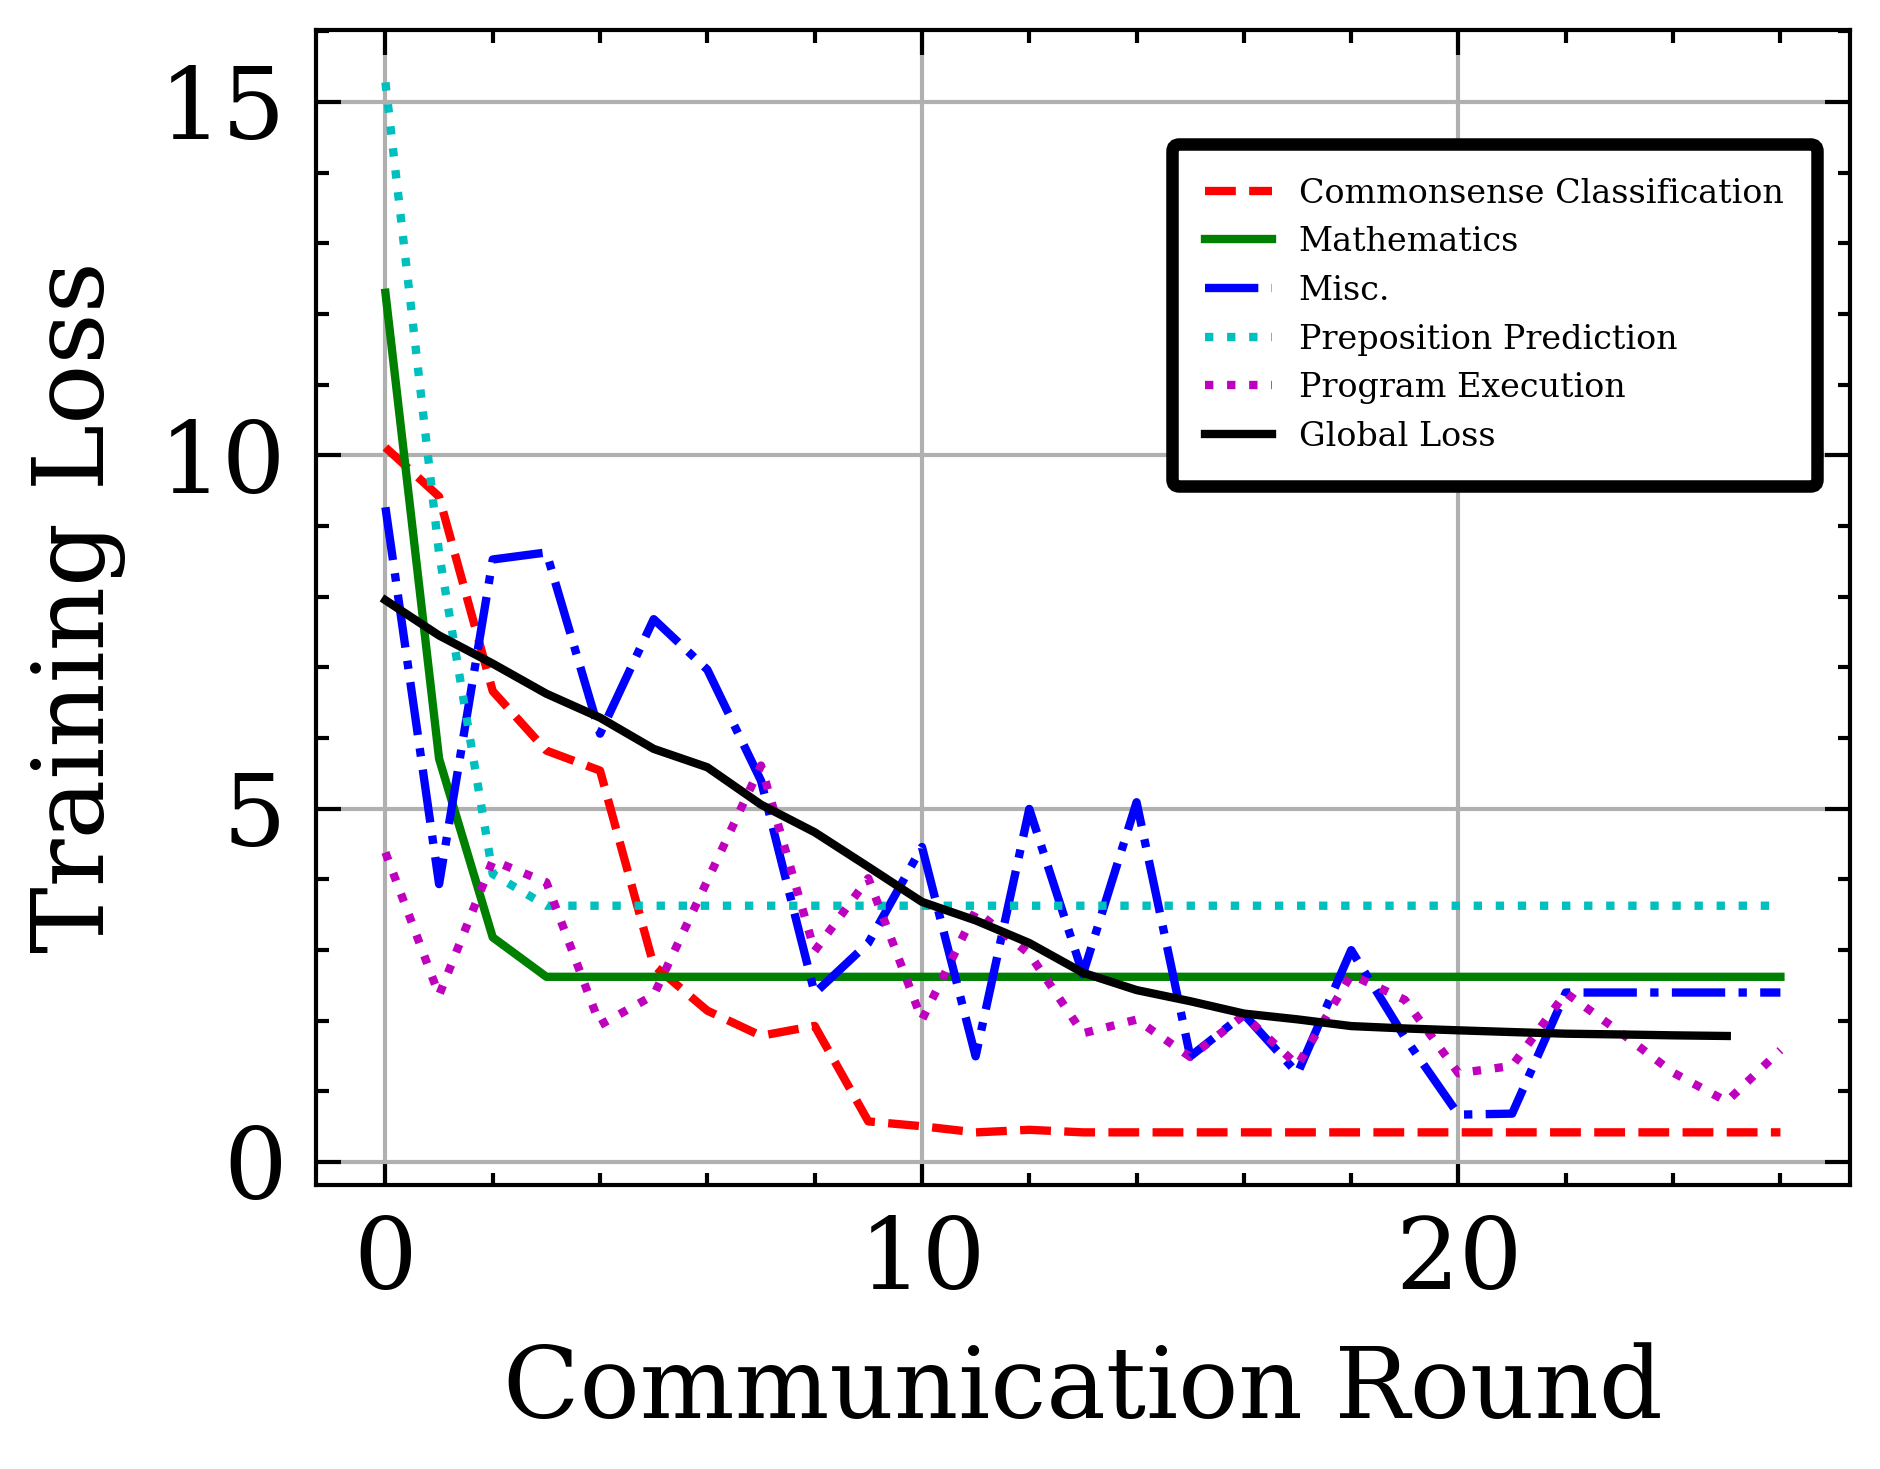

In [167]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w']
styles = ['--', '-', '-.', ':', 'dotted', 'dashdot', 'dashed', 'solid']

data = [unique_losses_df.loc[i, :][1:].to_list() for i in range(5)]

# plt.figure(figsize=(5, 3))
def smooth(data, window_size=3):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

fig, ax = plt.subplots()
for i in range(5):
    vals = data[i]
    plt.plot(vals,
             color=colors[i%8], 
             linestyle=styles[i%8], 
             label=unique_losses_df.loc[i, 'task'])
    
    # ax.plot(smooth(unique_losses_df.loc[:25, f'iteration_{i+1}']),
    #             color=colors[i%8], 
    #             linestyle='-', 
    #             label=unique_losses_df.loc[i, 'task'] + ' (smoothed)')

ax.plot(global_loss, color='black', label='Global Loss')

# Control the size of the box using borderaxespad and borderpad
legend = plt.legend(bbox_to_anchor=(0.5, 0.43, 0.5, 0.5),
                    borderaxespad=1,
                    borderpad=1,
                    frameon=True)

# set font size for legend
for label in legend.get_texts():
    label.set_fontsize(4)


# Adjust the padding using borderaxespad
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1)



# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communication Round', fontsize=12)
ax.set_ylabel('Training Loss', fontsize=12)
plt.tick_params(labelsize=12)
# set limit of y axis
# plt.ylim(0, 8)
# save the plot
ax.grid(True)
plt.savefig('task_losses 1.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [154]:
len(data)

5

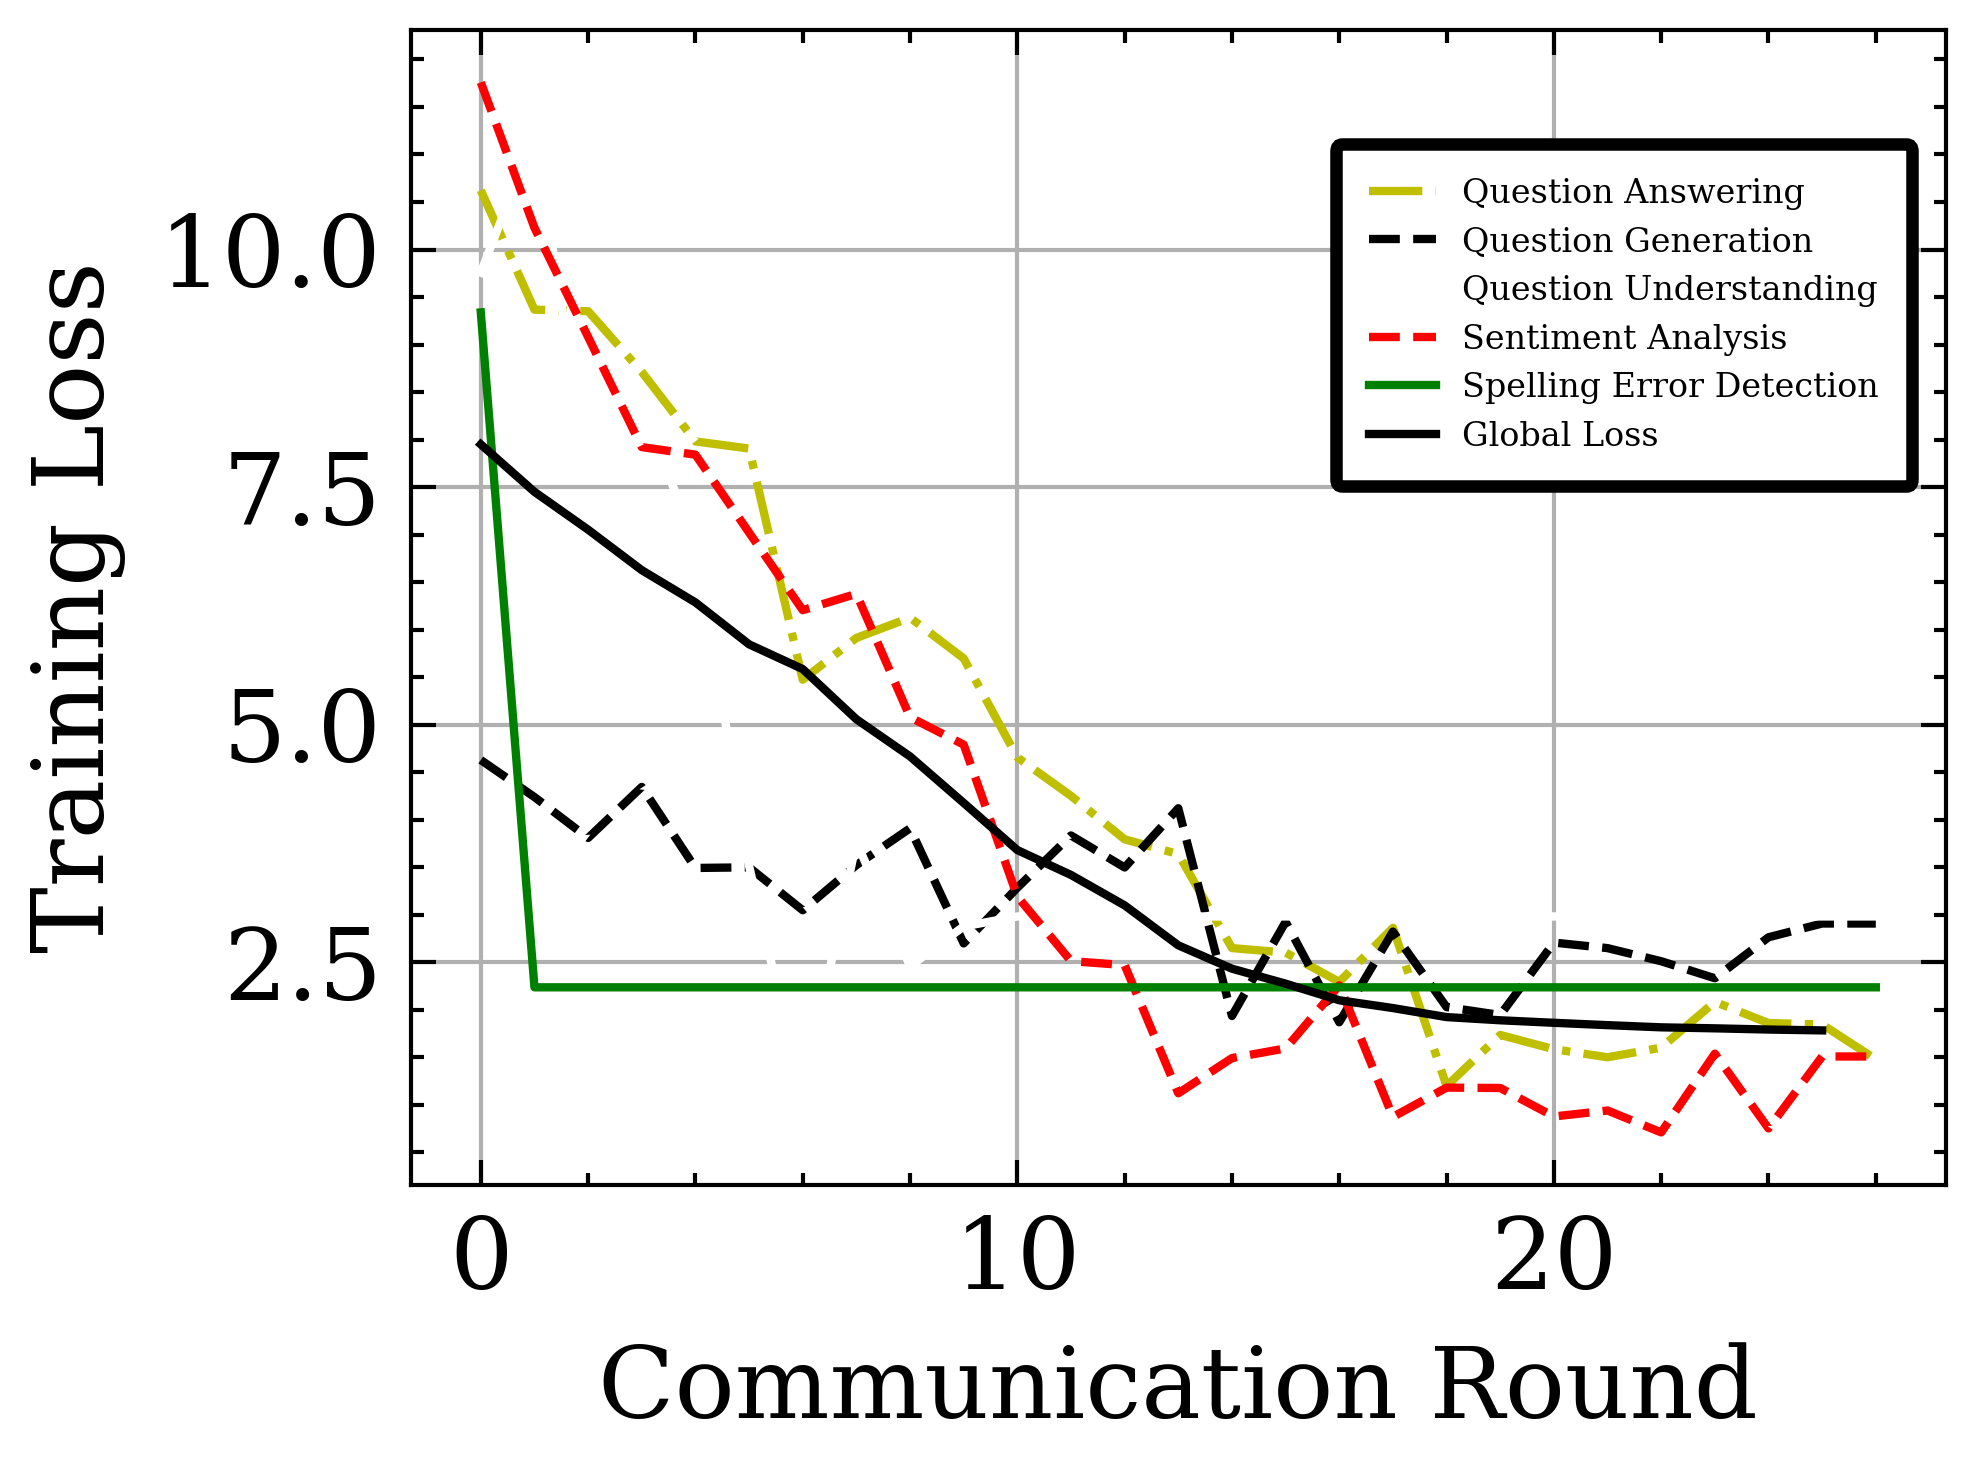

In [168]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w']
styles = ['--', '-', '-.', ':', 'dotted', 'dashdot', 'dashed', 'solid']

data = [unique_losses_df.loc[i, :][1:].to_list() for i in range(5, 10)]

# plt.figure(figsize=(5, 3))
def smooth(data, window_size=3):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

fig, ax = plt.subplots()
for i in range(5, 10):
    vals = data[i-5]
    plt.plot(vals,
             color=colors[i%8], 
             linestyle=styles[i%8], 
             label=unique_losses_df.loc[i, 'task'])
    
    # ax.plot(smooth(unique_losses_df.loc[:25, f'iteration_{i+1}']),
    #             color=colors[i%8], 
    #             linestyle='-', 
    #             label=unique_losses_df.loc[i, 'task'] + ' (smoothed)')

ax.plot(global_loss, color='black', label='Global Loss')

# Control the size of the box using borderaxespad and borderpad
legend = plt.legend(bbox_to_anchor=(0.5, 0.43, 0.5, 0.5),
                    borderaxespad=1,
                    borderpad=1,
                    frameon=True)

# set font size for legend
for label in legend.get_texts():
    label.set_fontsize(4)


# Adjust the padding using borderaxespad
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1)



# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communication Round', fontsize=12)
ax.set_ylabel('Training Loss', fontsize=12)
plt.tick_params(labelsize=12)
# set limit of y axis
# plt.ylim(0, 8)
# save the plot
ax.grid(True)
plt.savefig('task_losses 2.pdf', dpi=300, bbox_inches='tight')

plt.show()
